In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Emotion_classify_Data.csv")

# Display the first few rows
print(data.head())

# Display basic information about the dataset
print(data.info())

                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
None


In [3]:
# List all columns
print(data.columns)

# Check data types and null values
print(data.dtypes)
print(data.isnull().sum())

Index(['Comment', 'Emotion'], dtype='object')
Comment    object
Emotion    object
dtype: object
Comment    0
Emotion    0
dtype: int64


In [5]:
# Count duplicate rows
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")

Number of duplicate rows: 0
Data shape after removing duplicates: (5937, 2)


Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


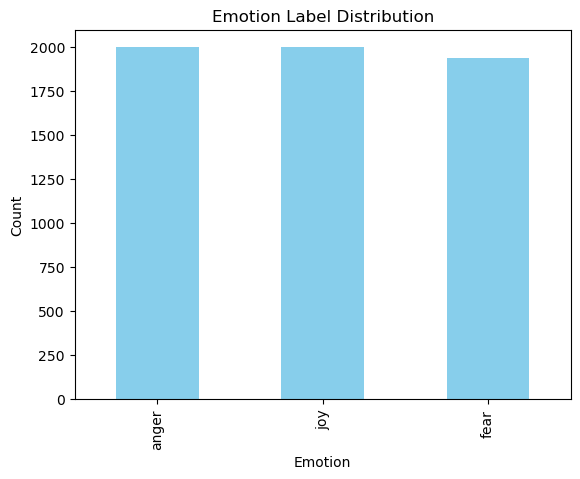

In [9]:
# Count the occurrences of each emotion
print(data['Emotion'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
data['Emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Emotion Label Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [11]:
# Print random samples of text and labels
print(data.sample(5))

                                                Comment Emotion
4001  a group of youngsters dressed in fads talked f...   anger
3077  im feeling a little grumpy today with the lame...   anger
3838  i feel like ive been terribly wronged and that...   anger
3011  i feel a cold coming on or drink a little extr...   anger
5296  i guess i am just feeling slightly shaken at t...    fear


In [13]:
# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values (if necessary)
data = data.dropna()

# Confirm no missing values remain
print(data.isnull().sum())

Comment    0
Emotion    0
dtype: int64
Comment    0
Emotion    0
dtype: int64


In [17]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Define a function to clean text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.lower()                  # Convert to lowercase
    text = text.strip()                  # Remove leading/trailing whitespace
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply the cleaning function to the text column
data['cleaned_text'] = data['Comment'].apply(clean_text)

# View a few examples
print(data[['Comment', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kp310\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Comment  \
0  i seriously hate one subject to death but now ...   
1                 im so full of life i feel appalled   
2  i sit here to write i start to dig out my feel...   
3  ive been really angry with r and i feel like a...   
4  i feel suspicious if there is no one outside l...   

                                        cleaned_text  
0  seriously hate one subject death feel reluctan...  
1                         im full life feel appalled  
2  sit write start dig feelings think afraid acce...  
3  ive really angry r feel like idiot trusting fi...  
4  feel suspicious one outside like rapture happe...  


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode emotion labels
data['emotion_encoded'] = label_encoder.fit_transform(data['Emotion'])

# View mappings
print(label_encoder.classes_)
print(data[['Emotion', 'emotion_encoded']].head())

['anger' 'fear' 'joy']
  Emotion  emotion_encoded
0    fear                1
1   anger                0
2    fear                1
3     joy                2
4    fear                1


In [23]:
from sklearn.model_selection import train_test_split

# Define features (X) and target labels (y)
X = data['cleaned_text']
y = data['emotion_encoded']

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 4749 samples
Validation set: 594 samples
Test set: 594 samples


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform validation and test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")

TF-IDF feature matrix shape: (4749, 5000)


Model Training

Validation Accuracy: 93.43%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       179
           1       0.94      0.91      0.92       220
           2       0.94      0.95      0.95       195

    accuracy                           0.93       594
   macro avg       0.93      0.94      0.93       594
weighted avg       0.93      0.93      0.93       594



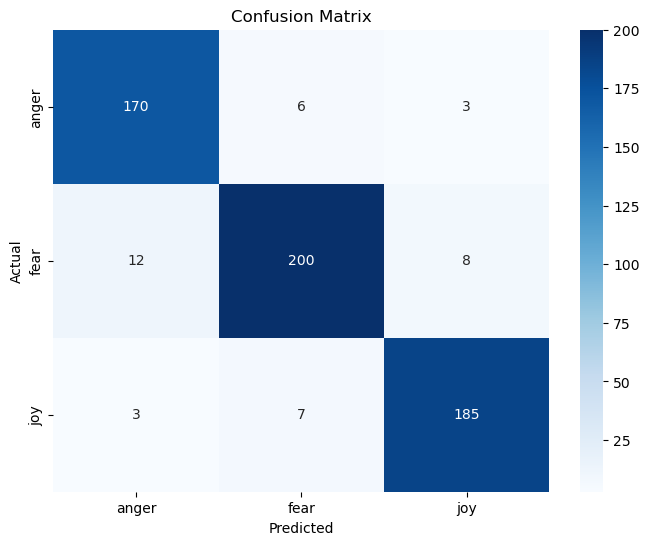

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model
model = LogisticRegression(max_iter=500)

# Train the model
model.fit(X_train_tfidf, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
import joblib

# Save the model
joblib.dump(model, 'emotion_classifier.pkl')

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [35]:
mood_to_yoga = {
    'happy': 'Dynamic sequences like Sun Salutations',
    'sad': 'Gentle poses like Child’s Pose and Forward Folds',
    'anger': 'Relaxation poses like Corpse Pose and Deep Breathing',
    'stressed': 'Meditative sequences with Breathing Exercises',
    'neutral': 'Balanced flows like Warrior Poses',
}

In [37]:
import joblib

# Load the saved model and vectorizer
model = joblib.load('emotion_classifier.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Define a function to recommend yoga sessions
def recommend_yoga(text):
    # Preprocess and vectorize the input text
    text_tfidf = vectorizer.transform([text])

    # Predict the emotion
    predicted_emotion = model.predict(text_tfidf)[0]

    # Get the corresponding emotion label
    emotion_label = label_encoder.inverse_transform([predicted_emotion])[0]

    # Get the recommended yoga session
    yoga_session = mood_to_yoga.get(emotion_label, 'Explore any yoga session of your choice')

    return emotion_label, yoga_session

# Test the recommendation system
user_input = "I feel very stressed and anxious."
emotion, session = recommend_yoga(user_input)
print(f"Detected Emotion: {emotion}")
print(f"Recommended Yoga Session: {session}")

Detected Emotion: anger
Recommended Yoga Session: Relaxation poses like Corpse Pose and Deep Breathing
